In [1]:
import random
import os
import tensorflow as tf  
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
%matplotlib inline
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'# 2 = INFO and WARNING messages are not printed
from livelossplot import PlotLossesKeras
os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)
input_shape = (32, 32, 3)
# Load in the data
cifar100 = tf.keras.datasets.cifar100
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
#print(tf.__version__)  
batch_size = 32
num_of_used_samples=2560
num_epochs=100
negotiation_rate=0#Normal training
num_classes = 100
#print(y_train)
# Reduce pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
# flatten the label values
y_train, y_test = y_train.flatten(), y_test.flatten()
#print(y_train)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
#print(y_train)
train_loss_list=[]
train_acc_list=[]
val_loss_list=[]
val_acc_list=[]
# number of classes
x_valid=x_train[num_of_used_samples:num_of_used_samples*2,:,:,:]
y_valid=y_train[num_of_used_samples:num_of_used_samples*2,:]
x_train=x_train[:num_of_used_samples,:,:,:]
y_train=y_train[:num_of_used_samples,:]
x_test=x_test[:num_of_used_samples,:,:,:]
y_test=y_test[:num_of_used_samples,:]
print(x_train.shape, y_train.shape,x_valid.shape, y_valid.shape, x_test.shape, y_test.shape)

(2560, 32, 32, 3) (2560, 100) (2560, 32, 32, 3) (2560, 100) (2560, 32, 32, 3) (2560, 100)


In [2]:
model = keras.Sequential([keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),layers.Flatten(),
                          layers.Dense(num_classes, activation="softmax"),])
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

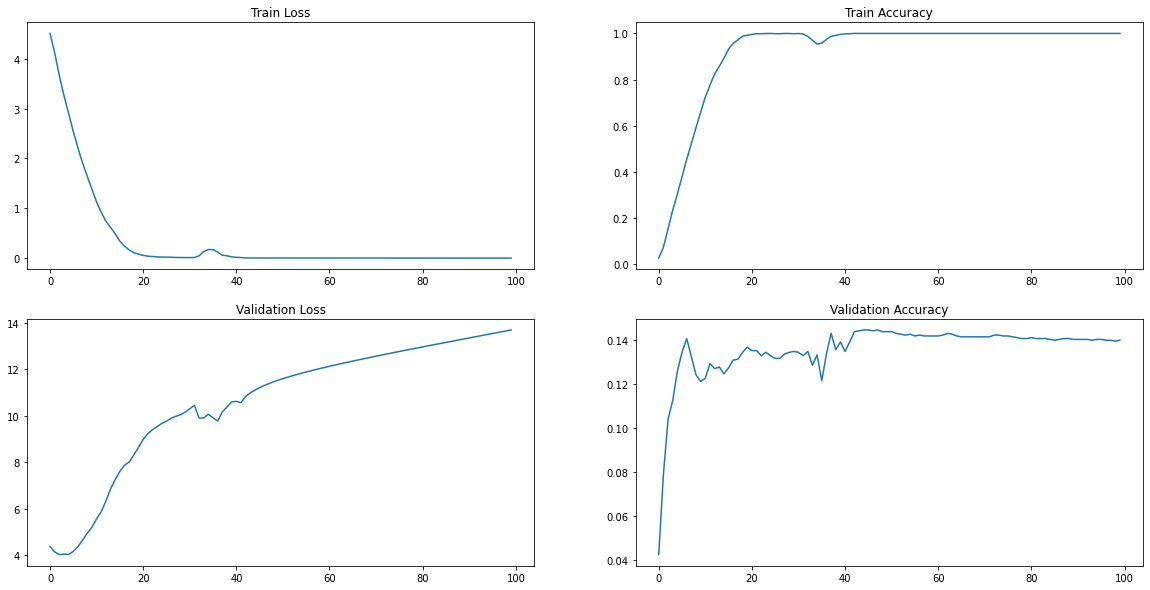

In [3]:
for train_phase in range(num_epochs):
    history=model.fit(x_train, y_train, batch_size=batch_size,validation_data=(x_valid,y_valid), epochs=1,verbose=0)
    pred_train= model.predict(x_train)
    cost_compensation=(y_train-pred_train)*negotiation_rate*train_phase
    y_train=y_train-cost_compensation
    train_loss_list.append(history.history["loss"])
    train_acc_list.append(history.history["accuracy"])
    val_loss_list.append(history.history["val_loss"])
    val_acc_list.append(history.history["val_accuracy"])
#put the losses and accs in order!
new_train_loss_list=[]
for my_element in train_loss_list:
    for my_item in my_element:
        new_train_loss_list.append(my_item)
new_train_acc_list=[]
for my_element in train_acc_list:
    for my_item in my_element:
        new_train_acc_list.append(my_item)
new_val_loss_list=[]
for my_element in val_loss_list:
    for my_item in my_element:
        new_val_loss_list.append(my_item)
new_val_acc_list=[]
for my_element in val_acc_list:
    for my_item in my_element:
        new_val_acc_list.append(my_item)
# visualize data by plotting images
fig, ax = plt.subplots(2, 2,figsize=(20,10))
ax[0][0].plot(new_train_loss_list)
ax[0][0].set_title('Train Loss')
ax[0][1].plot(new_train_acc_list)
ax[0][1].set_title('Train Accuracy')
ax[1][0].plot(new_val_loss_list)
ax[1][0].set_title('Validation Loss')
ax[1][1].plot(new_val_acc_list)
ax[1][1].set_title('Validation Accuracy')
plt.show()


In [4]:
new_val_acc_list[-1]

0.13984374701976776

In [5]:
pred_test= model.evaluate(x_test,y_test)
pred_test

80/80 [==============================] - 0s 1ms/step - loss: 13.4320 - accuracy: 0.1523


[13.432029724121094, 0.15234375]